# Proyek Data dalam Pengembangan Hotel Search Engine (ON GOING)



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Tahap pertama yaitu melakukan langkah yang dapat dieksekusi dalam mengolah data untuk mendapatkan tujuan yaitu dengan cara melakukan ETL pada data-data tersebut. ETL merupakan proses untuk mengolah data menjadi daya yang bersih sesuai dengan ketentuan data warehouse.
1. Extraction, proses ini melakukan penarikan data yang diberikan pada awal project yaitu data_hotel.xlsx dan review_hotel.xlsx

Review_hotel.xlsx :

- booking_id = nomor booking
- booking_date = tanggal booking
- hotel_id = id hotel yang telah dibooking
- hotel_name = nama hotel
- stay_duration = lama menginap
- adult = jumlah orang dewasa yang menginap
- children = jumlah anak yang menginap
- rating = rating hasil penilaian customer terhadap pelayanan hotel dan hotelnya
- review = review costumer terhadap pelayanan hotel dan hotelnya

Data_hotel.xlsx :

- hotel_id = id hotel
- hotel_name = nama_hotel
- hotel_description = deskripsi hotel
- hotel_province = provinsi hotel
- hotel_city = daerah/kota hotel
- hotel_address = alamat hotel
- price_per_night = harga sewa kamar per malam




# Data Cleansing

In [2]:
data_hotel = pd.read_excel('data_hotel.xlsx')
review_hotel = pd.read_excel('review_hotel.xlsx')

In [3]:
data_hotel.head()

,hotel_id,hotel_name,hotel_description,hotel_province,hotel_city,hotel_address,price_per_night
0,h0001,Midtown Residence Marvell City Surabaya,NaN,Jawa Timur,Surabaya,Jalan Ngagel Raya No 123,527866.666667
1,h0002,favehotel Graha Agung Surabaya,Sebuah Hotel Mewah di Surabaya Persembahan dar...,Jawa Timur,Surabaya,Jl. Mayjen Yono Soewoyo Pakuwon Indah Square A...,442860.000000
2,h0003,The Sun Hotel Sidoarjo,Hotel Bintang 3 Pertama dan Satu-satunya di Si...,Jawa Timur,Surabaya,"Jl. Pahlawan No.1,Sidokumpul, Sidoarjo, Suraba...",305000.000000
3,h0004,Grand Surabaya Hotel,Penginapan Yang Tenang Dan Nyaman Di Surabaya.,Jawa Timur,Surabaya,"Jl. Pemuda 19-21, Surabaya, Indonesia",324999.333333
4,h0005,The WIN Hotel Surabaya,WIN Hotel adalah hotel smart bintang 3 yang me...,Jawa Timur,Surabaya,"Jl. Embong Tanjung 46 - 48 Surabaya, Jawa Timu...",310947.250000


Melakukan perubahan tipe data pada price_per_night karena dia merupakan tipe data float, sedangkan pada kasus nyata tidak ada harga hotel dalam bentuk desimal. namun akan dibiarkan terlebih dahulu untuk penelitian atau keperluan analisis lebih lanjut

In [4]:
data_hotel.info()
data_hotel.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   hotel_id           1199 non-null   object 
 1   hotel_name         1199 non-null   object 
 2   hotel_description  1098 non-null   object 
 3   hotel_province     1199 non-null   object 
 4   hotel_city         1199 non-null   object 
 5   hotel_address      1199 non-null   object 
 6   price_per_night    1193 non-null   float64
dtypes: float64(1), object(6)
memory usage: 65.7+ KB


hotel_id               0
hotel_name             0
hotel_description    101
hotel_province         0
hotel_city             0
hotel_address          0
price_per_night        6
dtype: int64

In [5]:
data_hotel.loc[data_hotel['price_per_night'].isnull()]

,hotel_id,hotel_name,hotel_description,hotel_province,hotel_city,hotel_address,price_per_night
123,h0124,OYO 886 Omahku Asri Syariah,NaN,Jawa Timur,Malang,Jl. Danau Matana F3 A5,NaN
124,h0125,OYO 3712 Hotel Palem Sari,NaN,Jawa Timur,Malang,"Jalan Raya Punten 02, Kecamatan. Bumiaji",NaN
383,h0384,OYO 1185 Bukit Toedjoeh Residence Syariah,NaN,Sumatra Utara,Medan,"Jl. Bukit Barisan I No.7, Glugur Darat II, Kec...",NaN
389,h0390,OYO 597 Joyce Guest House,NaN,Sumatra Utara,Medan,Jalan Bunga Wijaya Kusuma no 62 padang bulan s...,NaN
392,h0393,OYO 1274 Prime Inn,NaN,Sumatra Utara,Medan,"Jl. Waru No.65, Sekip, Medan Petisah, Kota Med...",NaN
436,h0437,OYO 711 Salam Residence Syariah,NaN,Sumatra Utara,Medan,"Jl. Ringroad No.92, Sei Sikambing B, Medan Sun...",NaN


Dari perolehan data diatas dapat diketahui bahwa :
- data price_per_night terdapat nilai null(NAN) sehingga akan dibuang
- data hotel_description juga terdapat nilai null(NAN) dan akan diubah menjadi tanda strip yang berarti tidak ada deskripsi hotel

In [6]:
# codingan dibawah menjelaskan kita ingin membuang data null pada price_per_night dan mengganti data NAN pada hotel description
data_hotel = data_hotel.loc[data_hotel['price_per_night'].notnull()]
data_hotel['hotel_description'] = data_hotel['hotel_description'].fillna('-')

data_hotel['hotel_description'] = data_hotel['hotel_description'].str.replace('\n \n', '')
data_hotel['hotel_description'] = data_hotel['hotel_description'].str.replace('\n', ' ')

data_hotel.isnull().sum()

hotel_id             0
hotel_name           0
hotel_description    0
hotel_province       0
hotel_city           0
hotel_address        0
price_per_night      0
dtype: int64

Data hotel cleansing done dan tidak terdapat missing value namun price_per_night tetap dengan data float

In [7]:
review_hotel.head()

,booking_id,booking_date,hotel_id,hotel_name,stay_duration,adults,children,rating,review
0,b0001,19-04-2020,h0014,Zest Hotel Jemursari Surabaya,1,2,1,8.4,Short stay
1,b0002,06-04-2020,h0014,Zest Hotel Jemursari Surabaya,1,1,1,10.0,Hotelnya nyaman
2,b0003,24-03-2020,h0014,Zest Hotel Jemursari Surabaya,2,2,1,9.2,Cukup baik untuk transit
3,b0004,23-03-2020,h0014,Zest Hotel Jemursari Surabaya,1,2,0,9.2,Nyaman
4,b0005,14-03-2020,h0014,Zest Hotel Jemursari Surabaya,2,2,1,6.8,Not good


In [8]:
review_hotel.info()
review_hotel.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4306 entries, 0 to 4305
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   booking_id     4306 non-null   object 
 1   booking_date   4306 non-null   object 
 2   hotel_id       3833 non-null   object 
 3   hotel_name     4306 non-null   object 
 4   stay_duration  4306 non-null   int64  
 5   adults         4306 non-null   int64  
 6   children       4306 non-null   int64  
 7   rating         4306 non-null   float64
 8   review         4306 non-null   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 302.9+ KB


booking_id         0
booking_date       0
hotel_id         473
hotel_name         0
stay_duration      0
adults             0
children           0
rating             0
review             0
dtype: int64

In [9]:
review_hotel = review_hotel.dropna()
review_hotel.isnull().sum()

booking_id       0
booking_date     0
hotel_id         0
hotel_name       0
stay_duration    0
adults           0
children         0
rating           0
review           0
dtype: int64

In [12]:
print (data_hotel.shape)
print (review_hotel.shape)

(1193, 7)
(3833, 9)


In [14]:
# mencari rata-rata rating dari setiap hotel
rating1gb = review_hotel[['hotel_id','rating']].groupby(['hotel_id']).mean().reset_index()
rating1gb.head()

,hotel_id,rating
0,h0001,9.20
1,h0002,8.32
2,h0003,8.76
3,h0004,8.52
4,h0005,8.04


In [15]:
rating2gb = review_hotel[['hotel_name','rating']].groupby(['hotel_name']).mean()
rating2gb.head()

,rating
hotel_name,
45 Residence,3.60
7 Days Premium Hotel,8.20
AONE Hotel,8.84
AYANA Midplaza Jakarta,9.44
Adimulia Hotel Medan,8.80


In [16]:
rating = rating2gb.reset_index()
rating.head()

,hotel_name,rating
0,45 Residence,3.60
1,7 Days Premium Hotel,8.20
2,AONE Hotel,8.84
3,AYANA Midplaza Jakarta,9.44
4,Adimulia Hotel Medan,8.80


In [17]:
count_rating = review_hotel.groupby('hotel_name')['rating'].count().sort_values(ascending=False)
count_rating

hotel_name
The Salis Hotel Setiabudi                      20
Grand Tebu Hotel                               20
Vio Hotel Surapati                             20
Grand Asrilia Hotel Convention & Restaurant    20
Swiss-Belresort Dago Heritage                  20
                                               ..
Amaris Hotel Slipi                              1
Guest House Taman Sari                          1
Front One Residence Syariah Mampang             1
Ethan Hotel                                     1
45 Residence                                    1
Name: rating, Length: 408, dtype: int64

In [18]:
hasil = pd.merge(rating, count_rating, on = 'hotel_name')
hasil

,hotel_name,rating_x,rating_y
0,45 Residence,3.60,1
1,7 Days Premium Hotel,8.20,10
2,AONE Hotel,8.84,10
3,AYANA Midplaza Jakarta,9.44,5
4,Adimulia Hotel Medan,8.80,10
...,...,...,...
403,favehotel Solo Baru,8.60,10
404,favehotel Tanah Abang Cideng,8.24,10
405,favehotel Tlogomas Malang,9.68,10
406,ibis Styles Medan Pattimura,8.96,10


In [19]:
hasil = hasil.rename(columns = {'rating_y':'rating_sequence'})
hasil

,hotel_name,rating_x,rating_sequence
0,45 Residence,3.60,1
1,7 Days Premium Hotel,8.20,10
2,AONE Hotel,8.84,10
3,AYANA Midplaza Jakarta,9.44,5
4,Adimulia Hotel Medan,8.80,10
...,...,...,...
403,favehotel Solo Baru,8.60,10
404,favehotel Tanah Abang Cideng,8.24,10
405,favehotel Tlogomas Malang,9.68,10
406,ibis Styles Medan Pattimura,8.96,10


In [20]:
data = data_hotel[['hotel_name','hotel_id','hotel_address','hotel_city','price_per_night']]
data

,hotel_name,hotel_id,hotel_address,hotel_city,price_per_night
0,Midtown Residence Marvell City Surabaya,h0001,Jalan Ngagel Raya No 123,Surabaya,527866.666667
1,favehotel Graha Agung Surabaya,h0002,Jl. Mayjen Yono Soewoyo Pakuwon Indah Square A...,Surabaya,442860.000000
2,The Sun Hotel Sidoarjo,h0003,"Jl. Pahlawan No.1,Sidokumpul, Sidoarjo, Suraba...",Surabaya,305000.000000
3,Grand Surabaya Hotel,h0004,"Jl. Pemuda 19-21, Surabaya, Indonesia",Surabaya,324999.333333
4,The WIN Hotel Surabaya,h0005,"Jl. Embong Tanjung 46 - 48 Surabaya, Jawa Timu...",Surabaya,310947.250000
...,...,...,...,...,...
1194,Restu Hotel Yogyakarta,h1195,"Jl. Batikan No. 7, Pandeyan, Kec. Umbulharjo, ...",Jogja,150000.000000
1195,Oryza Hotel Malioboro,h1196,"Sosrowijayan St No.49-51, Sosromenduran, Gedon...",Jogja,180000.000000
1196,Hotel Asri Graha Yogyakarta,h1197,"Jl. Veteran No. 184 A, Umbulharjo, Yogyakarta,...",Jogja,262500.000000
1197,Tasneem Convention Hotel Yogyakarta,h1198,"Kawasan Mandira Baruga, Jl. Brigjen Katamso, K...",Jogja,391666.666667


In [21]:
hasil1 = pd.merge(hasil,data,on='hotel_name')
hasil1

,hotel_name,rating_x,rating_sequence,hotel_id,hotel_address,hotel_city,price_per_night
0,45 Residence,3.60,1,h0665,"Jl. Mangga Besar XI, RW.1, Kota Tua, Tangki, T...",Jakarta Barat,1.759785e+05
1,7 Days Premium Hotel,8.20,10,h0466,"Jl. Matraman Raya No. 173-175 Balimester, Jati...",Jakarta,3.194775e+05
2,AONE Hotel,8.84,10,h0513,"Jl. Wahid Hasyim No.80, Jakarta Pusat, Indonesia",Jakarta Pusat,4.700000e+05
3,AYANA Midplaza Jakarta,9.44,5,h0633,"Jl. Jend. Sudirman Kav 10-11, Karet Tengsin, T...",Jakarta Pusat,2.078628e+06
4,Adimulia Hotel Medan,8.80,10,h0365,"Jl. Pangeran Diponegoro No. 8, Medan, Indonesia",Medan,1.559388e+06
...,...,...,...,...,...,...,...
403,favehotel Solo Baru,8.60,10,h0180,"Jl. Raya Solo Baru, Solo, Jawa Tengah, Indonesia",Solo,2.891093e+05
404,favehotel Tanah Abang Cideng,8.24,10,h0487,"Jl. Cideng Timur No.58, Petojo Selatan, Jakart...",Jakarta Selatan,3.288540e+05
405,favehotel Tlogomas Malang,9.68,10,h0154,"Jl. Tlogomas No. 25, Lowokwaru, Malang, Jawa T...",Malang,2.341350e+05
406,ibis Styles Medan Pattimura,8.96,10,h0369,Jalan Pattimura No 442 Kelurah,Medan,4.061070e+05


In [22]:
data1 = review_hotel[['hotel_name','booking_id','booking_date','stay_duration','adults','children','review']]
data1

,hotel_name,booking_id,booking_date,stay_duration,adults,children,review
0,Zest Hotel Jemursari Surabaya,b0001,19-04-2020,1,2,1,Short stay
1,Zest Hotel Jemursari Surabaya,b0002,06-04-2020,1,1,1,Hotelnya nyaman
2,Zest Hotel Jemursari Surabaya,b0003,24-03-2020,2,2,1,Cukup baik untuk transit
3,Zest Hotel Jemursari Surabaya,b0004,23-03-2020,1,2,0,Nyaman
4,Zest Hotel Jemursari Surabaya,b0005,14-03-2020,2,2,1,Not good
...,...,...,...,...,...,...,...
4301,The Luxton Bandung,b4302,10-08-2019,1,2,2,Hotel kurang perawatan dan membosankan
4302,The Luxton Bandung,b4303,25-07-2019,2,2,2,Kurang perawatan
4303,The Luxton Bandung,b4304,08-07-2019,2,2,2,Mantul
4304,The Luxton Bandung,b4305,15-04-2019,3,2,2,Kecewa


# Exploratory Data Analyst

In [23]:
column_names =['hotel_id','hotel_name','booking_id','price_per_night','rating_x','rating_sequence','booking_date','stay_duration','adults','children','hotel_city']
hasil2 =pd.merge(hasil1,data1,on='hotel_name')
hasil2 = hasil2.reindex(columns=column_names)
hasil2

,hotel_id,hotel_name,booking_id,price_per_night,rating_x,rating_sequence,booking_date,stay_duration,adults,children,hotel_city
0,h0665,45 Residence,b3242,175978.5,3.60,1,02-11-2019,3,1,0,Jakarta Barat
1,h0466,7 Days Premium Hotel,b1338,319477.5,8.20,10,02-05-2020,3,1,0,Jakarta
2,h0466,7 Days Premium Hotel,b1339,319477.5,8.20,10,03-01-2020,1,1,1,Jakarta
3,h0466,7 Days Premium Hotel,b1340,319477.5,8.20,10,28-12-2019,1,1,0,Jakarta
4,h0466,7 Days Premium Hotel,b1341,319477.5,8.20,10,04-12-2019,3,2,2,Jakarta
...,...,...,...,...,...,...,...,...,...,...,...
3828,h0027,ibis budget Surabaya Diponegoro,b0161,206232.0,8.08,10,08-12-2019,2,1,1,Surabaya
3829,h0027,ibis budget Surabaya Diponegoro,b0162,206232.0,8.08,10,03-12-2019,2,1,0,Surabaya
3830,h0027,ibis budget Surabaya Diponegoro,b0163,206232.0,8.08,10,14-10-2019,1,1,1,Surabaya
3831,h0027,ibis budget Surabaya Diponegoro,b0164,206232.0,8.08,10,13-10-2019,2,2,0,Surabaya


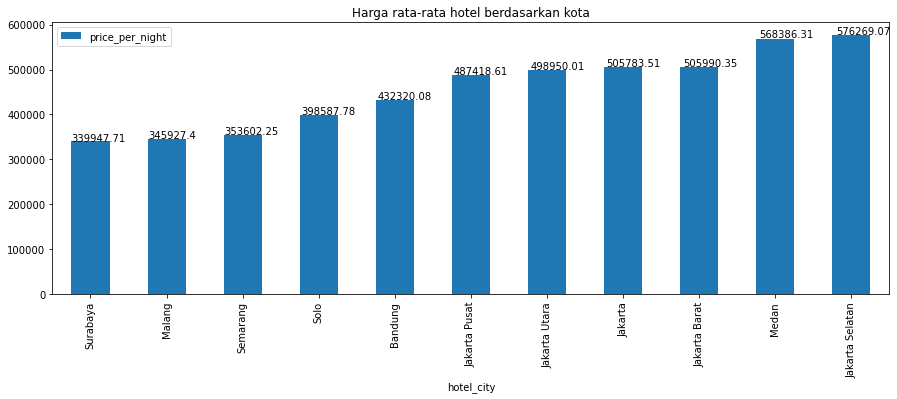

In [30]:
plt.rcParams["figure.figsize"] = [15,5]
df_rt = hasil2[['price_per_night','hotel_city']].loc[hasil2['price_per_night'] != 0].groupby(['hotel_city']).mean().reset_index().sort_values(by='price_per_night')
df_rt['price_per_night'] = round(df_rt['price_per_night'],2)
ax = df_rt.plot(kind='bar', x='hotel_city',y='price_per_night',title ='Harga rata-rata hotel berdasarkan kota')
for p in ax.patches:
    ax.annotate(str(p.get_height()),(p.get_x()*1.005,p.get_height()*1.005))

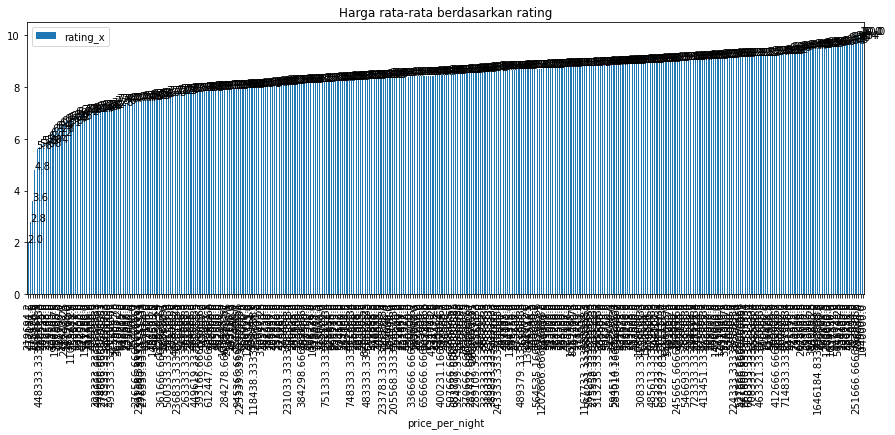

In [31]:
plt.rcParams["figure.figsize"] = [15,5]
df_rt = hasil2[['price_per_night','rating_x']].loc[hasil2['rating_x'] != 0].groupby(['price_per_night']).mean().reset_index().sort_values(by='rating_x')
df_rt['rating_x'] = round(df_rt['rating_x'],2)
ax = df_rt.plot(kind='bar', x='price_per_night',y='rating_x',title ='Harga rata-rata berdasarkan rating')

for p in ax.patches:
    ax.annotate(str(p.get_height()),(p.get_x()*1.005,p.get_height()*1.005))

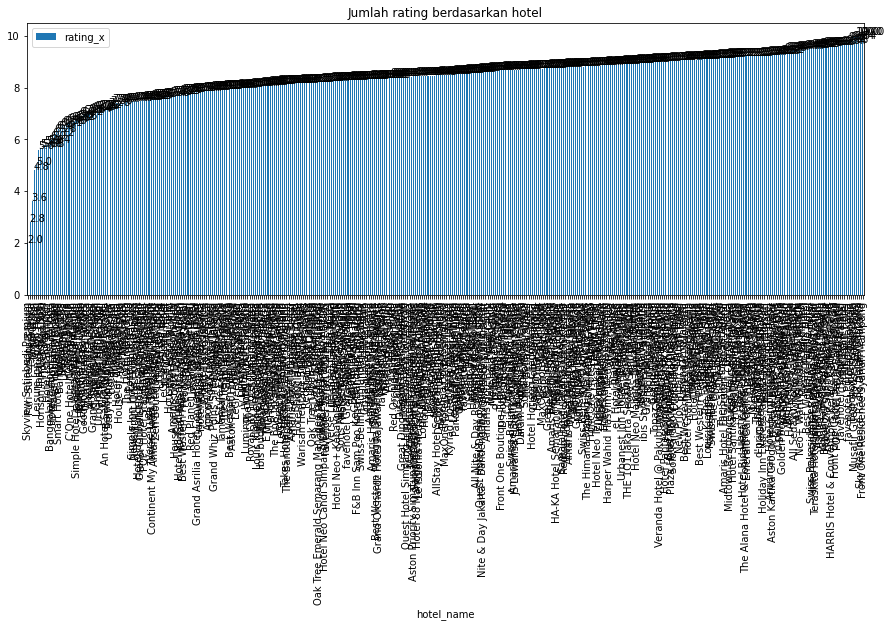

In [32]:
plt.rcParams["figure.figsize"] = [15,5]
df_rt = hasil2[['hotel_name','rating_x']].loc[hasil2['rating_x'] != 0].groupby(['hotel_name']).mean().reset_index().sort_values(by='rating_x')
df_rt['rating_x'] = round(df_rt['rating_x'],2)
ax = df_rt.plot(kind='bar', x='hotel_name',y='rating_x',title ='Jumlah rating berdasarkan hotel')
for p in ax.patches:
    ax.annotate(str(p.get_height()),(p.get_x()*1.005,p.get_height()*1.005))

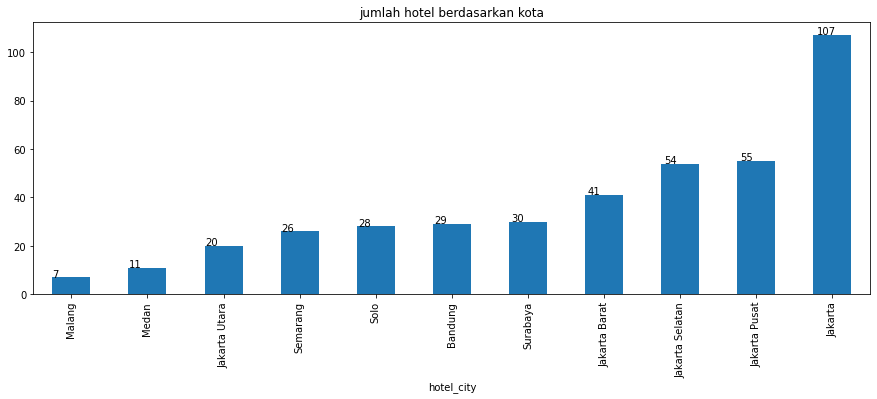

In [33]:
ax = hasil2.groupby('hotel_city')['hotel_name'].nunique().sort_values().plot(kind='bar',title='jumlah hotel berdasarkan kota')
for p in ax.patches:
    ax.annotate(str(p.get_height()),(p.get_x()*1.005,p.get_height()*1.005))

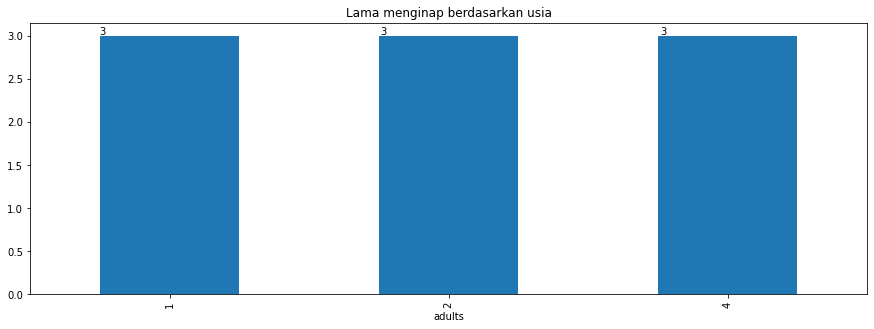

In [34]:
ax = hasil2.groupby('adults')['stay_duration'].nunique().sort_values().plot(kind='bar',title='Lama menginap berdasarkan usia')
for p in ax.patches:
    ax.annotate(str(p.get_height()),(p.get_x()*1.005,p.get_height()*1.005))

In [35]:
review_hotel['year'] = pd.DatetimeIndex(review_hotel['booking_date']).year
review_hotel.head()

,booking_id,booking_date,hotel_id,hotel_name,stay_duration,adults,children,rating,review,year
0,b0001,19-04-2020,h0014,Zest Hotel Jemursari Surabaya,1,2,1,8.4,Short stay,2020
1,b0002,06-04-2020,h0014,Zest Hotel Jemursari Surabaya,1,1,1,10.0,Hotelnya nyaman,2020
2,b0003,24-03-2020,h0014,Zest Hotel Jemursari Surabaya,2,2,1,9.2,Cukup baik untuk transit,2020
3,b0004,23-03-2020,h0014,Zest Hotel Jemursari Surabaya,1,2,0,9.2,Nyaman,2020
4,b0005,14-03-2020,h0014,Zest Hotel Jemursari Surabaya,2,2,1,6.8,Not good,2020


In [36]:
data_year = pd.merge(review_hotel[['hotel_id','year']],data_hotel[['hotel_id','hotel_city']],on='hotel_id',how='left')
data_year = data_year.drop('hotel_id',axis =1)
data_year.head()

,year,hotel_city
0,2020,Surabaya
1,2020,Surabaya
2,2020,Surabaya
3,2020,Surabaya
4,2020,Surabaya


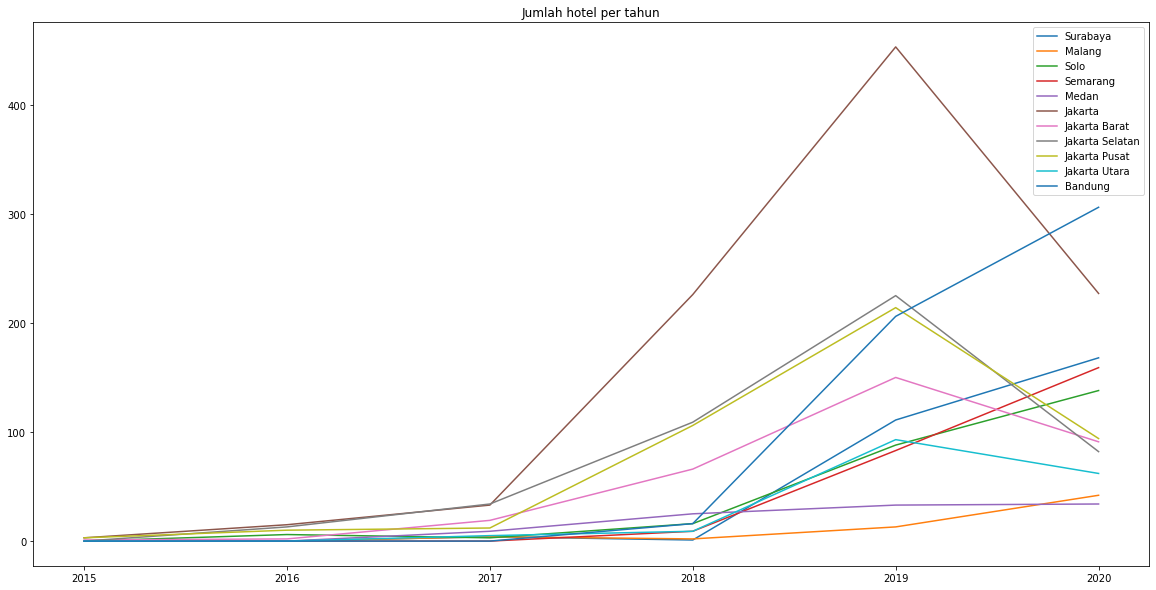

In [37]:
plt.rcParams["figure.figsize"] = [20,10]
plt.title('Jumlah hotel per tahun')

def statistik_kota(kota):
    data = {}
    for j in data_year['year'].unique():
        data[str(j)] = len(data_year.loc[(data_year['year'] == j) & (data_year['hotel_city'] == kota)])
    the_series = pd.Series(data)
    the_series = the_series.sort_index()
    plt.plot(the_series.index, the_series.values, Label = kota)
    plt.legend()
for i in data_year['hotel_city'].unique():
    statistik_kota(i)

Grafik diatas menjelaskan bahwa jumlah pesanan atau booking  hotel setiap tahun berdasarkan kota mengalami cenderung mengalami kenaikan sejak 2015 hingga 2019, namun mulai menurut menuju 2020 yang dikarenakan pandemi Covid19

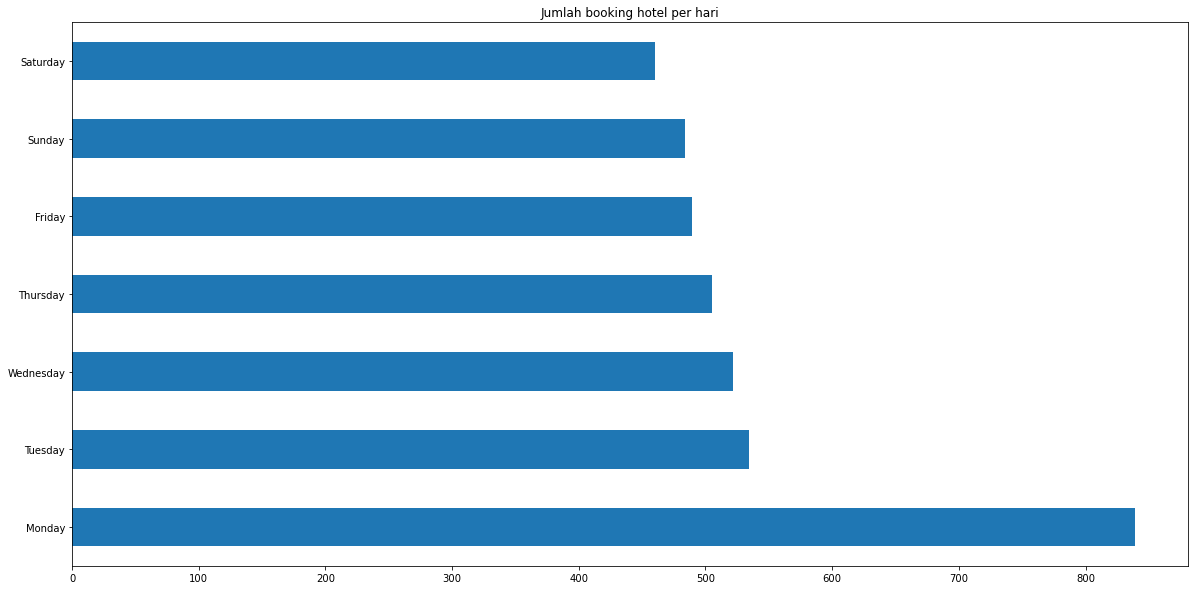

In [38]:
review_hotel['day'] = pd.DatetimeIndex(review_hotel['booking_date']).day_name()
review_hotel['day'].value_counts().plot(kind='barh', title = 'Jumlah booking hotel per hari')

Berdasarkan data diatas pesanan dengan jumlah terbanyak yaitu pada hari senin dan dengan jumlah terdikit pada hari sabtu